### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
from funcs import matplotlib_imshow

## Canny Edge Detection ([Docs](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html))

Some useful resources:
- https://learnopencv.com/edge-detection-using-opencv/
- https://pyimagesearch.com/2021/05/12/opencv-edge-detection-cv2-canny/

Edge detection is an image-processing technique that is used to identify the boundaries (edges) of objects or regions within an image. Edges are among the most important features associated with images. We know the underlying structure of an image through its edges. Computer vision processing pipelines, therefore, extensively use edge detection in applications.

`Sudden changes in pixel intensity characterize edges`. We need to look for such changes in the neighboring pixels to detect edges. The `Sobel Operator` is used to detect edges marked by sudden changes in pixel intensity. `The rise in intensity is even more evident when we plot the first derivative of the intensity function`.

<img src="./imgs/sobel_edge_detection.jpeg">

`Canny Edge Detection` is a popular `multistage` edge detection algorithm. Stages involved in the edge detection process are, 
- Noise removal (Gaussian Smoothing)
- Calculating the Intensity Gradient of the Image (using a Sobel kernel)
- Non-maximum Suppression (for suppression of false edges)
- Hysteresis Thresholding (for deciding which of the probable edges are really edges and which are not)

> The `cv.Canny(image, threshold1, threshold2, apertureSize, L2gradient)` function

<u>Function Parameters</u>

- image: input image (should be grayscale).
- threshold1: first threshold for the hysteresis procedure.
- threshold2: second threshold for the hysteresis procedure.
- apertureSize: aperture size for the Sobel operator.
- L2gradient: Determines the formula used for image gradient calculation.
    - If True, L2 norm = √ [(dI/dx)**2+(dI/dy)**2] is used which is more accurate
    - If False (default), L1 norm =|dI/dx|+|dI/dy| is used. 

In [4]:
# Example of using canny edge detection
dog_img = cv.imread("./imgs/dog_noisy_img.png", 0)

In [5]:
# blurring
dog_img_blurred = cv.GaussianBlur(dog_img, (7, 7), sigmaX=0)

In [6]:
# sharpening
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
dog_img_sharpened = cv.filter2D(dog_img_blurred, ddepth=-1, kernel=sharpening_kernel)

In [7]:
# morph operation, closing, for reducing white noise
morph_kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
dog_img_morphed = cv.morphologyEx(dog_img_sharpened, cv.MORPH_CLOSE, morph_kernel)

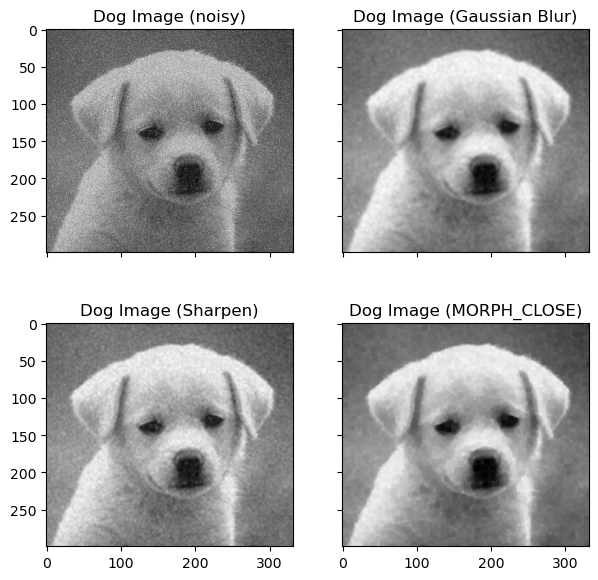

In [8]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(
    nrows=2, ncols=2, sharex=True, sharey=True, figsize=(7, 7)
)
# fig.set_figheight(7), fig.set_figwidth(7)
ax11.imshow(dog_img, "gray"), ax11.set_title("Dog Image (noisy)")
ax12.imshow(dog_img_blurred, "gray"), ax12.set_title("Dog Image (Gaussian Blur)")
ax21.imshow(dog_img_sharpened, "gray"), ax21.set_title("Dog Image (Sharpen)")
ax22.imshow(dog_img_morphed, "gray"), ax22.set_title("Dog Image (MORPH_CLOSE)")
plt.show()

In [9]:
# canny edge detection
dog_edges = cv.Canny(dog_img_morphed, 70, 130, apertureSize=3, L2gradient=False)

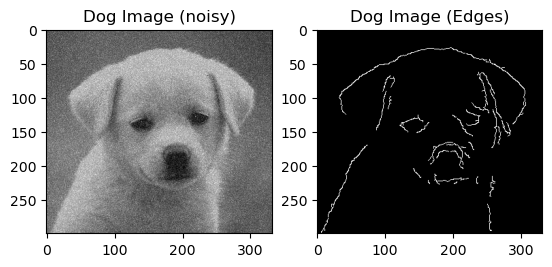

In [10]:
plt.subplot(1, 2, 1).imshow(dog_img, "gray"), plt.title("Dog Image (noisy)")
plt.subplot(1, 2, 2).imshow(dog_edges, "gray"), plt.title("Dog Image (Edges)")
plt.show()

#### **Auto Canny ([Source](https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/))**

In [11]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv.Canny(image, lower, upper)
    # return the edged image
    return edged

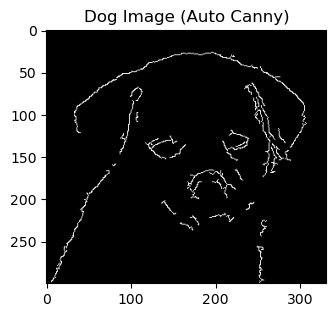

In [12]:
matplotlib_imshow("Dog Image (Auto Canny)", auto_canny(dog_img_sharpened), 4)

**`Note:`** As we can see from the above example, if your imgae doesn't have a clear background and foreground distinction, it is very hard to accurately detect edges. 